## Background / Motivation

### Background

A song's popularity is often a proxy for, if not a direct route to, its success. And, as 83% of music revenue today is attributed to online streaming services, achieving popularity on a streaming platform like Spotify is incredibly important to record labels, producers, and artists alike [2]. However, with an approximated 100,000 new songs being added to streaming servies like Spotify each day, it may seem as if one's song could get lost in the noise and have little chance of gracing the charts [3]. With this uncertainty comes several opportunities: to (1) identify what factors are associated with or lead to a song's popularity, (2) form targeted recommendations based on those findings, and (3) to then have aspiring artists implement these recommendations in their songs to increase their chance of success. 

### Motivations

All of our group members are musicians by trade. Thus, our motivation in pursuing this project was to better understand an industry that we all care about and participate in. But we also all use Spotify on a daily basis and follow trending songs across multiple genres. We are all aware that a song's popularity is directly associated with its number of streams, its revenue, and ultimately its success. This project offered us an opportunity to explore the factors associated with a song's popularity (in its qualities, title, and markets) as well as how such factors change over time: to understand the "how" behind _how a song rises to the top_. 

## Problem statement 

To approach our analyses, we first articulated four questions that addressed song popularity through different lenses (song qualities, change over time, song titles, and market differences in popularity). Our four questions are as follows

1. What musical qualities are most positively and negatively correlated with a song's success?

2. How have the audio features of popular songs changed over the past two decades? What is the combination of audio features most conducive to popularity?

3. What characteristics of song titles are associated with song popularity (or lack thereof)? 

4. What factors are associated with a song's success in different markets? Do international audiences prefer different qualities than American ones? Does targeting the preferences of international audiences result in increased streaming success for top American artists?

## Data sources

We chose to incorporate two datasets in our analysis. The first was a dataset with song information from tracks on Spotify (downloaded via Kaggle.com). The second was a set of songs that charted in the Top-40 (i.e., top 40 most popular) in the United States and in Europe [1][5]. 

### Dataset 1: Kaggle Spotify Dataset

Our first dataset contained information on songs hosted on Spotify. The dataset was downloaded from Kaggle.com. The original dataset was entitled "_Spotify Dataset, 600k+ Tracks_' and contained information on songs released between 1900 and April of 2021. Yamac Eren Ay, the dataset's author, collected all data by using Spotify's API [1]. Eren Ay then amalgamated approximately 600,000 songs and more than 1 million artists into two _CSV_ files: (1) __artists.csv__ and (2) __tracks.csv__[1]. The _CSV_ file we chose to focus on for our analysis was the __tracks.csv__ file, as it contained pertinent information on song qualities and song popularity (our main variables of interest). 

The uncleaned __tracks.csv__ contained 20 variables related to song information. Generally, these variables fell into three categories: 

__Category 1: Artist Information:__ Song artists (artists), artist IDs (id_artists)

__Category 2: General Song Data:__ Song IDs (id), song name (name), the song's duration in milliseconds (duration_ms), the song's release date (release_date), the song's time signature (time_signature), the song popularity (popularity)

__Category 3: Song Characteristics:__ Use of explicit language (explicit), danceability, energy, loudness, mode, acousticness, instrumentalness, a song's liveliness (liveness), valence, tempo

For our analyses, we were specifically interested in the variables from the __Song Characteristics__ category, as well as three variables from the __General Song Data__ category: (1) song name, (2) release date, and (3) popularity score. The Spotify dataset from Kaggle can be found at [this link](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks). 

### Dataset 2: Top 40 Charts in the United States and Europe

The second dataset we used (specifically for our fourth analysis) included annual chart data from Top-40 Charts in both the U.S. and in Europe. This data included song names, artist names, entry and peak positions, and the duration of a song's top charting position in weeks. The variables relevant to our analysis were: (1) song name and (2) artist name. By cross-searching these categories in our Spotify dataset, we could then find the characteristic data for all the top hits in the US and in Europe. The Top-40 chart data can be found at [this link](https://top40-charts.com/chart.php?cid=27).

## Stakeholders

Spotify is the largest streaming platform in the world: with 350 million users and 150 million subscribers. [12] Thus, this platform has monumental influence on the music industry: any information on how to achieve popularity on Spotify would be useful to record labels, producers and/or artists that either have a Spotify presence or are looking to establish one. 

There is no "right or wrong" when it comes to producing music. But there are certain musical combinations that "work" (i.e., make it onto the top charts and/or garner more streams). Then also too there are those songs that are forgotten. If there were a way to better predict the formula behind a successful song on Spotify, our stakeholders could use that information to better engineer songs that have a higher probability of becoming popular and successful (i.e., generating online streams revenue and catapulting an artist's fame). Our stakeholders could also use this information to predict which of their songs has the highest chance of commercial success on Spotify. Thus, their money could be better spent on marketing those songs to their Spotify listeners.

## Data quality check / cleaning / preparation 

### Dataset 1: Kaggle Spotify Dataset

#### Part 1: Data Preparation and Cleaning

To process and clean the data from the Kaggle Spotify dataset, our methodology was as follows: first, identify the number of null (i.e. missing) values in the dataset; second, if the number of null values is significant (i.e., more than 2-5% of the data), impute missing values; third, if the number of null values is not significant, drop them from the dataset, and; finally, convert the "release_date" variable to _datetime_ format and extract both release year and release month from it

We began by importing the __tracks.csv__ file with Pandas and noting the shape of each resulting DataFrame (the information in the __artists.csv__ file was not relevant to our analysis). We found that the __tracks__ dataframe contained 586,672 observations about songs across 20 variables. 

The next step in the data cleaning process was to check for null values using the _.isnull()_ function. The __tracks.csv__ file contained 71 missing/null observations in the 'Song Name' column. As song names are uniquely difficult to impute (they bear no relation to other song attributes or variables) and the 71 missing values represented a mere 0.0121% of the total observations in the __tracks__ DataFrame, we chose to drop those observations using the _.dropna()_ method. Further, the datatype of the "Release Date" column was changed to _datetime_ format for later analysis, and two new columns were created in the dataset: one for the release year of a song, and another for the release month of a song. The resulting dataset contained 586,601 observations across 22 variables. The dataset was then ready to analyze. 

In [10]:
# Importing the pandas library
import pandas as pd 

# Importing the tracks.csv 
tracks = pd.read_csv('tracks.csv')

In [11]:
# Noting the number of null values in each dataframe
tracks.isnull().sum() # 71 missing values in the 'song name' column
print('The null values here consist of', round((71/tracks.shape[0])*100, 4), '% of the tracks dataset') # the null values here are less than 0.0121% of the obs in the DataFrame

The null values here consist of 0.0121 % of the tracks dataset


In [12]:
# Dropping the null values from both datasets
tracks = tracks.dropna()
print('The shape of the tracks dataframe after dropping null values is ', tracks.shape) # (586601, 20)

The shape of the tracks dataframe after dropping null values is  (586601, 20)


In [13]:
# Changing the release date column to datetime format
tracks['release_date'] = pd.to_datetime(tracks['release_date'])

# Creating a new column for release year 
year = tracks['release_date'].apply(lambda x : x.year) # using a lambda function here 
tracks.insert(loc=8, column='year', value=year) 

# Creating a new column for release month
month = tracks['release_date'].apply(lambda x : x.month) # using a lambda function here
tracks.insert(loc=9, column='month', value=month)

#### Part 2: Distributions of Each Variable Used in Analysis

The __tracks.csv__ file had 22 variables of interest. Of those, we were interested in the following 17: (1) song name (name), (2) song popularity (popularity), (3) duration of the song in milliseconds (duration_ms), (4) explicit word use (explicit), (5) year of release (year), (6) month of release (month), (7), how danceable a song is (danceability), (8) the level of energy in a song (energy), (9) the song's key (key), (10) how loud a song is (loudness), (11) the song's mode (mode), (12), the amount of words said in a song relative to instrumentation (speechiness), (13) the amount of acoustic elements in a song (acousticness), (14) the amount of instrumentation in a song relative to the amount of words said (instrumentalness), (15) the liveliness of a song (liveness), (16) the valence of a song (valence), and (17) the tempo of a song (tempo).

##### 1) Song Name (name)

The variable __name__ represents the song title for tracks in the dataset in string form. This  variable, which represents a string of characterics, is non-numeric and non-categorical.

##### 2) Song Popularity (popularity) 

The variable __popularity__ represents the popularity of a given song. It is an integer value between zero and 100, with 100 being the most popular. The Spotify API calculated song popularity using the Spotify algorithm. This score is based, in part, on the total number of plays the track has had and how recent those plays are [6]. Thus, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. 

In [8]:
# Showing the variable's distribution
print('The distribution of the popularity variable is as follows: ')
tracks.popularity.describe()

The distribution of the popularity variable is as follows: 


count    586601.000000
mean         27.573212
std          18.369417
min           0.000000
25%          13.000000
50%          27.000000
75%          41.000000
max         100.000000
Name: popularity, dtype: float64

##### 3) Song Duration in Milliseconds (duration_ms)

The variable __duration_ms__ is an integer value of the duration of a given track in milliseconds [6].

In [9]:
# Showing the variable's distribution
print('The distribution of the duration_ms variable is as follows: ')
tracks.duration_ms.describe()

The distribution of the duration_ms variable is as follows: 


count    5.866010e+05
mean     2.300549e+05
std      1.265328e+05
min      3.344000e+03
25%      1.750830e+05
50%      2.149070e+05
75%      2.638670e+05
max      5.621218e+06
Name: duration_ms, dtype: float64

##### 4) Explicit Word Use (explicit)

The variable __explicit__ is a boolean in integer form (1 = True, 0 = False) for whether a given song contains explicit language.

In [15]:
# Showing the variable's distribution
print('The distribution of the explicit variable is as follows: ')
print()

print('Value counts are as follows:')
print(tracks.explicit.value_counts())
print()

print('Number of unique values is as follows:', tracks.explicit.nunique())
print()

print('Number of missing values are as follows:', tracks.explicit.isnull().sum())

The distribution of the explicit variable is as follows: 

Value counts are as follows:
0    560737
1     25864
Name: explicit, dtype: int64

Number of unique values is as follows: 2

Number of missing values are as follows: 0


##### 5) Release Year (year) 

The variable __year__ represents the release year of a given track. It was derived from the __release_date__ column of the original dataset. This variable contains a range of integer values between 1900 and 2021 (the start and end points of the dataset's date range).

In [16]:
# Showing the variable's distribution
print('The distribution of the year variable is as follows: ')
tracks.year.describe()

The distribution of the year variable is as follows: 


count    586601.000000
mean       1988.571729
std          22.826243
min        1900.000000
25%        1974.000000
50%        1992.000000
75%        2007.000000
max        2021.000000
Name: year, dtype: float64

##### 6) Release Month (month) 

The variable __month__ represents the release month of a given track. It was derived from the __release_date__ column of the original dataset. This variable contains a range of integer values between 1 and 12 (January and December). 

In [17]:
# Showing the variable's distribution
print('The distribution of the month variable is as follows: ')
tracks.month.describe()

The distribution of the month variable is as follows: 


count    586601.000000
mean          4.446399
std           3.991136
min           1.000000
25%           1.000000
50%           2.000000
75%           8.000000
max          12.000000
Name: month, dtype: float64

##### 7) Song Danceability (danceability)

The variable __danceability__ is listed in the dataset as a number ranging from zero to one,  having the float datatype. As noted in the Spotify for Developers documentation, this variable is defined as a way to describe how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity [6]. A __danceability__ value of 0.0 indicates that a song is not danceable and a value of 1.0 indicates that a song is very danceable [6].

In [18]:
# Showing the variable's distribution
print('The distribution of the danceability variable is as follows: ')
tracks.danceability.describe()

The distribution of the danceability variable is as follows: 


count    586601.000000
mean          0.563612
std           0.166101
min           0.000000
25%           0.453000
50%           0.577000
75%           0.686000
max           0.991000
Name: danceability, dtype: float64

##### 8) Song Energy (energy)

The variable __energy__ is listed in the dataset as a number ranging from zero to one, having the float datatype. In the Spotify for Developers documentation this variable is listed as a way to represent a sort of perceptual measure of intensity and activity. Energetic  tracks feel fast, loud, and noisy (like rock and roll or death metal, for example). In contrast, low-energy tracks like Lo-Fi music or orchestral preludes are far more slow-paced, quiet, and calming. Perceptual features that contribute to a song's energy include its musical range, loudness, timbre, and tempo.

In [19]:
# Showing the variable's distribution
print('The distribution of the energy variable is as follows: ')
tracks.energy.describe()

The distribution of the energy variable is as follows: 


count    586601.000000
mean          0.542071
std           0.251910
min           0.000000
25%           0.343000
50%           0.549000
75%           0.748000
max           1.000000
Name: energy, dtype: float64

##### 9) Song Key (key)

The variable __key__ is an integer that describes what key a track is in (using standard Pitch Class Notation, with 11 pitches total). When no key is detected in a song, it is assigned a key value of -1. 

In [21]:
# Showing the variable's distribution
print('The distribution of the key variable is as follows: ')
print()

print('Value counts are as follows:')
print(tracks.key.value_counts())
print()

print('Number of unique values is as follows:', tracks.key.nunique())
print()

print('Number of missing values are as follows:', tracks.key.isnull().sum())

The distribution of the key variable is as follows: 

Value counts are as follows:
0     74940
7     73772
2     66550
9     65124
5     53605
4     48214
1     41731
11    39128
10    37700
8     33457
6     30852
3     21528
Name: key, dtype: int64

Number of unique values is as follows: 12

Number of missing values are as follows: 0


##### 10) Loudness of Song (loudness)

The variable __loudness__ describes the overall loudness of a given song in decibels (dB) [6]. Loudness values are averaged across the entire song. Most loudness values typically range between -60 and 0 dB [6].

In [22]:
# Showing the variable's distribution
print('The distribution of the loudness variable is as follows: ')
tracks.loudness.describe()

The distribution of the loudness variable is as follows: 


count    586601.000000
mean        -10.205789
std           5.089422
min         -60.000000
25%         -12.891000
50%          -9.242000
75%          -6.481000
max           5.376000
Name: loudness, dtype: float64

##### 11) Song Mode (mode)

The variable __mode__ describes the modality of a song (either major or minor). A __mode__ value of 1 represents major, and a __mode__ value of 0 represents minor.

In [24]:
# Showing the variable's distribution
print('The distribution of the mode variable is as follows: ')
print()

print('Value counts are as follows:')
print(tracks['mode'].value_counts())
print()

print('Number of unique values is as follows:', tracks['mode'].nunique())
print()

print('Number of missing values are as follows:', tracks['mode'].isnull().sum())

The distribution of the mode variable is as follows: 

Value counts are as follows:
1    386451
0    200150
Name: mode, dtype: int64

Number of unique values is as follows: 2

Number of missing values are as follows: 0


##### 12) Amount of Words in a Song Relative to Instrumentation (speechiness)

The variable __speechiness__ describes the amount of spoken words in a song relative to the amount of instrumentation in it. In the dataset, it is listed as a number in range zero to one (with the datatype float). The more vocal components in a song, the closer its __speechiness__ value will be to 1.0. 

In [25]:
# Showing the variable's distribution
print('The distribution of the speechiness variable is as follows: ')
tracks.speechiness.describe()

The distribution of the speechiness variable is as follows: 


count    586601.000000
mean          0.104870
std           0.179902
min           0.000000
25%           0.034000
50%           0.044300
75%           0.076300
max           0.971000
Name: speechiness, dtype: float64

##### 13) Amount of Acoustic Elements in a Song (acousticness)

The variable __acousticness__ is listed in the dataset as a number ranging from zero to one,  having the float datatype. As noted in the Spotify for Developers documentation, this variable is a confidence measure from 0.0 to 1.0 of whether the track is acoustic [6]. An __acousticness__ value of 1.0 represents high confidence the track is acoustic, whereas a value of 0.0 represents low confidence that there are acoustic elements in a track [6].

In [26]:
# Showing the variable's distribution
print('The distribution of the acousticness variable is as follows: ')
tracks.acousticness.describe()

The distribution of the acousticness variable is as follows: 


count    586601.000000
mean          0.449803
std           0.348812
min           0.000000
25%           0.096900
50%           0.422000
75%           0.784000
max           0.996000
Name: acousticness, dtype: float64

##### 14) Amount of Instrumentation in a Song Relative to Words (instrumentalness)

The variable __instrumentalness__ is listed in the dataset as a number ranging from zero to one, having the float datatype. This variable describes the amount of vocals are in a rong relative to its instrumentation [6]. For example, rap music is highly vocal (and would rank closer to 0.0 on instrumentalness), whereas classical music is less vocal (and would rank closer to 1.0 for intrumentalness). The greater the __instrumentalness__ score is to 1.0, the greater the likelihood that there is no speech in the song. 

In [27]:
# Showing the variable's distribution
print('The distribution of the instrumentalness variable is as follows: ')
tracks.instrumentalness.describe()

The distribution of the instrumentalness variable is as follows: 


count    586601.000000
mean          0.113425
std           0.266843
min           0.000000
25%           0.000000
50%           0.000024
75%           0.009550
max           1.000000
Name: instrumentalness, dtype: float64

##### 15) Song Liveness (liveness)

The variable __liveness__ is listed in the dataset as a number ranging from zero to one, having the float datatype. As noted in the Spotify for Developers notation, this variable detects the presence of an audience in the recording of a given song [6]. Higher __liveness__ scores indicate an an increased probability that the song was performed live.

In [28]:
# Showing the variable's distribution
print('The distribution of the liveness variable is as follows: ')
tracks.liveness.describe()

The distribution of the liveness variable is as follows: 


count    586601.000000
mean          0.213933
std           0.184328
min           0.000000
25%           0.098300
50%           0.139000
75%           0.278000
max           1.000000
Name: liveness, dtype: float64

##### 16) Song Valence (valence)

The variable __valence__ is listed in the dataset as a float value between 0.0 and 1.0. It describes the level of musical positivity conveyed by a given song [6]. Tracks with high valence (i.e., __valence__ scores closer to 1.0) are generally more positive, happy, or cheerful. Tracks with low valence (i.e., __valence__ scores closer to 0.0) are generally more negative, angry, or sad. 

In [29]:
# Showing the variable's distribution
print('The distribution of the valence variable is as follows: ')
tracks.valence.describe()

The distribution of the valence variable is as follows: 


count    586601.000000
mean          0.552306
std           0.257673
min           0.000000
25%           0.346000
50%           0.564000
75%           0.769000
max           1.000000
Name: valence, dtype: float64

##### 17) Song Tempo (tempo)

The variable __tempo__ is a float value for the estimated tempo of a track in beats per minute (BPM). Tempo, in music generally, is defined as the speed of a given song. It is derived from the average beat duration in a given track. 

In [30]:
# Showing the variable's distribution
print('The distribution of the tempo variable is as follows: ')
tracks.tempo.describe()

The distribution of the tempo variable is as follows: 


count    586601.000000
mean        118.467930
std          29.762942
min           0.000000
25%          95.606000
50%         117.387000
75%         136.324000
max         246.381000
Name: tempo, dtype: float64

### Dataset 2: Top 40 Charts for the United States and Europe

#### Part 1: Data Preparation and Cleaning
The data and preparation process started by using a different data science tool (Excel) to organize the Top-40 charts data. When converting the data to Excel, the extraneous columns were removed, revealing that all pertinent data existed in the first column. Every fifth row represented a new song. The pertinent variables for our analysis was the song name and artist name. 

In [1]:
# Importing the pandas library
import pandas as pd

# Importing the CSVs
usa_raw = pd.read_csv('usa_top_40.csv')
eu_raw = pd.read_csv('eu_top_40.csv')

In [2]:
# Cleaning data to make df with song/artist rows

usa_songs = usa_raw[usa_raw.index %5  == 1]
usa_artist = usa_raw[usa_raw.index %5  == 2]
usa_songs.reset_index(drop=True, inplace=True)
usa_artist.reset_index(drop=True, inplace=True)


usa_chart = pd.DataFrame()
usa_chart['song'] = usa_songs.loc[:, ['1']]
usa_chart['artist'] = usa_artist.loc[:, ['1']]

eu_songs = eu_raw[eu_raw.index %5  == 1]
eu_artist = eu_raw[eu_raw.index %5  == 2]
eu_songs.reset_index(drop=True, inplace=True)
eu_artist.reset_index(drop=True, inplace=True)


eu_chart = pd.DataFrame()
eu_chart['song'] = eu_songs.loc[:, ['1']]
eu_chart['artist'] = eu_artist.loc[:, ['1']]

#### Part 2: Distributions of Each Variable Used in Analysis

Since all variables of interest were text (non-categorical and non-continuous), the main form of data validation for this dataset included information comparison with other chart sites. The information from the U.S. Top-40 charts was consistent with that from the Billboard charts. The European Top-40 charts information had enough similarities to other European specific charts to continue our analysis. 

## Exploratory Data Analysis

### Analysis 1: Exploring Factors Correlated with Song Popularity
*By Lila Wells*

#### Part 1: Identifying the Problem and Anticipations for both Issues and Success
I was interested in exploring what factors correlate with a song's popularity. My rationale was this: if I could identify several factors that were positively and negatively associated with song popularity, then I could not only form actionable recommendations for aspiring artists, but also better understand how and why certain songs succeed on music streaming platforms like Spotify.

I anticipated several challenges in this analysis. The first was that, due to the myriad of songs and genres in the dataset (and on Spotify as a platform), different factors may be successful in different genres. Also, I anticipated that my analysis for the variables __year__ and __month__ (i.e., release year and release month) could be skewed by how the Spotify API measures popularity. Because the API assigns each song a 'popularity score' when taking into account the number of times a song was played recently, this could potentially skew my analysis away from songs that were (and potentially still are) quite popular but were released in years past. 

Further, there are some songs that spike in popularity due to Internet trends and extraneous factors (see the song "Harlem Shake" which inspired Internet dance videos or Psy's 2012 hit "Gagnam Style", whose popularity rode on a similar phenomenon). Put bluntly: popularity isn't an exact science, so my recommendations would include some level of uncertainty. Though, I expected some level of success in this analysis because, while "Harlem Shake," "Gangnam Style," and more recent song-dance trends like Doja Cat's "Say So" base much of their popularity on extraneous factors (like social media and dances), far more of the 80 million tracks on Spotify achieve popularity on the platform itself. Thus, identifying correlations between song attributes and popularity may be useful for the _vast majority_ of artists and aspiring artists on the platform. [4]. 

#### Part 2: Methodology and Findings

I approached this question with a two-part methodology. First, I calculated correlation values between all song-attribute variables in the __tracks__ dataframe and popularity and evaluated the Pearson's Correlation Constant _r_ to identify the direction and magnitude of the relationship. Second, I plotted and binned variables of interest to note the their relationship with a song's popularity.

I began by first evaluating what factors most correlated with popularity, then visualizing these relationships with a heatmap. In this, I found that _mode, speechiness, acoustincness, instrumentalness, and liveness_ (i.e. liveliness) in a song were all slightly negatively correlated with its popularity, whereas all other variables in the dataset (_duration in milliseconds, using explicit language, danceability, energy, key, loudness, valence, tempo, and time signature_) were all slightly positively correlated with popularity. As noted in __A1 Figure 1__ the strongest negative correlations between song attributes and popularity were acousticness and instrumentalness, with correlation values of -0.3701 and -0.2364, respectively (_see folded code cells for the figure_). The strongest positive correlations between song attributes and popularity were year of release, energy and loudness, with correlation values of 0.5908, 0.3022 and 0.3270, respectively. Though, as these correlation values were quite low (indicating a weak relationship between these attributes and popularity), I decided to investigate these correlations further. __(See A1 Figure 1 in the Appendix section)__

I created a dataframe of the correlation values obtained in the first part of my analysis and dropped all correlation values (and corresponding attributes) with correlation values (i.e., Pearson's Correlation Coefficient of _r_ less than 0.1). Most correlation values noted between song attributes and popularity were initially weak at best, however removing all correlation values closest to zero (i.e., less than 0.2 for positive correlations and more negative than -0.2 for negative correlations) removed attributes that are unlikely to be as helpful in later analysis). This reduced the number of attributes to the following: (1) explicit (use of explicit language), (2) year of release, (3) energy, (4) loudness, (5) acousticness, and (6) instrumentation. I then manipulated plotted these attributes against popularity to assess the nature of their associations. 

In my findings below, I do not imply that correlation is causation (i.e., that adding or removing any elements would lead to a song's popularity). Rather, these findings are suggesitons that _could_ lead to a greater likelihood of a song reaching the upper eschelons of popularity within the Spotify streaming service (based on the platform's data). 

In [15]:
# First, creating a copy of the tracks dataset to work with 
tracks_df = tracks.copy()

# Extracting a value for 'popularity' to use in corr calculations
popularity = tracks_df.popularity

# Calculating corr coefficients in tracks_df with popularity
tracks.corrwith(popularity)

popularity          1.000000
duration_ms         0.027638
explicit            0.211749
year                0.590796
month               0.136916
danceability        0.186878
energy              0.302178
key                 0.015306
loudness            0.327001
mode               -0.033652
speechiness        -0.047415
acousticness       -0.370723
instrumentalness   -0.236403
liveness           -0.048735
valence             0.004558
tempo               0.071223
time_signature      0.086713
dtype: float64

In [25]:
# Weeding out attributes in the dataset with corr values < 0.1 with popularity
corr_values = tracks.corrwith(popularity)
corr_vals = pd.DataFrame(corr_values) # converting this to a df

corr_vals.reset_index(inplace=True)
corr_vals = corr_vals.rename(columns = {'index':'Song_Attribute', 0:'Corr_Val'})

corr_vals.shape # 17 attributes

print('All song qualities and their correlation values with song popularity (first two rows shown of 17):')
print(corr_vals.head(2))

Song qualities with highest magnitude of negative correlations:
  Song_Attribute  Corr_Val
0     popularity  1.000000
1    duration_ms  0.027638


In [26]:
# Selecting for variables with a stronger negative corr
corr_vals_neg = corr_vals.copy()

# Removing all weak negative correlations
corr_vals_neg = corr_vals_neg[corr_vals_neg['Corr_Val'] < -0.2]

print('Song qualities with highest magnitude of negative correlation with popularity:')
print(corr_vals_neg.head())
# Left with only acousticness and instrumentalness

Song qualities with highest magnitude of negative correlations:
      Song_Attribute  Corr_Val
11      acousticness -0.370723
12  instrumentalness -0.236403


In [28]:
# Dropping all correlation values less than 0.2
corr_vals = corr_vals[corr_vals['Corr_Val'] > 0.2] # removing all vars with weak correlations

# Dropping all correlation values btw 0 and .1
corr_vals = corr_vals[corr_vals['Corr_Val'] != 1] # removing popularity (100% corr with itself)

print('Song qualities with the highest magnitude of positive correlation with song popularity:')
print(corr_vals.head()) # 6 attributes remaining

Song qualities with the highest magnitude of positive correlation with song popularity:
  Song_Attribute  Corr_Val
2       explicit  0.211749
3           year  0.590796
6         energy  0.302178
8       loudness  0.327001


__The relationship between using explicit terms and song popularity:__ I created a new dataframe from the __tracks__ data (here called __explicit_df__) that grouped explicit language use by popularity score (0 to 100). This allowed me to visualize approximately what percentage of songs with a given popularity value contained explicit content. As noted in figure __A1 Figure 2__ a large percentage of songs with the highest popularity (i.e., 80 to 100) contained some sort of explicit verbage in them. In contrast, far fewer songs that ranked among the least popular (0 to 20) used explicit terms. This finding does suggest that, if an artist wants their song to be among the most popular on Spotify, they may want to consider swearing a bit (even if just a little, the proportion of songs that use explicit terms generally increases as song popularity does). __(See the Appendix Section for A1 Figure 2)__

In [34]:
# Investigating the relationship between explicit language use and popularity
tracks_df.explicit.value_counts() # binary variable - 0, or no (560,737 observations) and 1, or yes (25,864)

print(round((560737/tracks_df.shape[0]),2)*100, 'of songs in the df do not use explicit terms') # 96% of the songs in the df do not use explicit content
print(round((25864/tracks_df.shape[0]),2)*100, 'of songs in the df use explicit terms') # 4% of the songs in the df do use explicit content

# Plotting the relationship between popularity and explicit word use
explicit_df = tracks_df.groupby('popularity')['explicit'].mean().sort_values(ascending=[False]).reset_index() # resetting the index for readability (and potential later analysis)
print('First two rows of the explicit dataframe below:')
print(explicit_df.head(2))

96.0 of songs in the df do not use explicit terms
4.0 of songs in the df use explicit terms
First two rows of the explicit dataframe below:
   popularity  explicit
0         100       1.0
1          99       1.0


__The relationship between using year of release and song popularity:__ I followed a similar methodology to explore the relationship between year of release and popularity. As noted in __A1 Figure 3__, popularity generally seems to increase as a song's year of release progresses. The most popular songs, at levels 98, 99, and 100 (on a popularity scale from zero to 100) were all released in 2021. And, when inspecting popularity scores of 90-100, I found that songs with that popularity score were largely between the end of 2019 and 2021 (the most recent years of the dataset). This finding is consistent with how the Spotify API measures popularity (i.e., by recent song streams): songs that are more recently released are more likely to be popular. __(See the Appendix Section for A1 Figure 3)__


In [33]:
# Creating a df that groups by popularity and year of release
year_df = tracks_df.groupby('popularity')['year'].mean().sort_values(ascending=[False]).reset_index() # resetting the index for readability (and potential later analysis)

print('First two rows of the year dataframe below: ')
print(year_df.head(2))

First two rows of the year dataframe below: 
   popularity    year
0         100  2021.0
1          99  2021.0


__The relationship between using energy and song popularity:__ As noted in the trendline of __A1 Figure 4__ (i.e., its positive slope), there is a generally positive correlation between a song's energy and its popularity. However, it was interesting to note that most songs with popularity scores between ~40 and 100 had energy values between 0.6 and 0.65 (i.e., medium to high energy). While this does not suggest that high energy is the recipe for song popularity, it does hint that, if an artist wants to emulate the most popular songs in an effort to acheive the same exposure (and accolades), they may want to consider adding medium-to-high energy components to their song (i.e., quicker beats and rhythms and upbeat tempos).__(See the Appendix Section for A1 Figure 4)__

In [35]:
# Creating a df that groups by popularity and energy
energy_df = tracks_df.groupby('popularity')['energy'].mean().sort_values(ascending=[False]).reset_index() # resetting the index for readability (and potential later analysis)
print('The first two rows of the energy dataframe:')
print(energy_df.head(2))

The first two rows of the energy dataframe:
   popularity  energy
0          92  0.7068
1         100  0.6960


__The relationship between using loudness and song popularity:__ As noted in __A1 Figure 5__, the loudness of songs in the dataset generally increased with their popularity score (_see A1 Figure 7 in the folded code cells_). In this dataset, large negative values for loudness indicate a quiet song. As the loudness value approaches or eclipses zero, the song's loudness increases. Thus, while it is difficult to discern exactly _how loud_ the songs in this dataset are, __A1 Figure 5__ indicates that loudness (relative to other songs in the dataset) is positively correlated with popularity. The loudest songs in the dataset (with loudness scores of -7 to -6) were generally in the top 20% of songs in terms of popularity (i.e., with scores from 80 to 100) This suggests that incorporating loud elements into one's song (whether that be with vocals, beats, or electronic elements) is generally favorable if an artist wants their song to be popular. __(See the Appendix Section for A1 Figure 5)__


In [36]:
# Creating a df that groups by popularity and loudness
loud_df = tracks_df.groupby('popularity')['loudness'].mean().sort_values(ascending=[False]).reset_index() # resetting the index for readability (and potential later analysis)
print('The first two rows of the loudness dataframe: ')
print(loud_df.head(2))

The first two rows of the loudness dataframe: 
   popularity  loudness
0          92 -5.877000
1          88 -6.008684


__The relationship between acousticness and popularity:__ As noted in __A1 Figure 6__ acousticness and song popularity are indeed negatively correlated (indicated by the negative slope of the scatterplot's trendline). Here, we saw that songs with small to moderate amounts of acoustic elements (i.e., with acousticness scores between 0 to 0.3) had quite large popularity scores on average (between 50 and 100). Yet when a song's acousticness score increased past ~0.5, its popularity typically plummeted below 20 (i.e., in the lowest 20% of the data). This suggests using heavy acoustic elements in a song may be detrimental to its popularity but, if an artist wanted to add small to moderate amounts of acousticness to that song, it still may become popular. __(See the Appendix Section for A1 Figure 6)__

In [37]:
# Creating a df that groups by popularity and acousticness
acoustic_df = tracks_df.groupby('popularity')['acousticness'].mean().sort_values(ascending=[False]).reset_index() # resetting the index for readability (and potential later analysis)
print('First two rows of acoustic dataframe below:')
print(acoustic_df.head(4))

First two rows of acoustic dataframe below:
   popularity  acousticness
0           0      0.772854
1          99      0.721000
2           1      0.667383
3           2      0.625454


__The relationship between instrumentalness and song popularity:__ As noted in __A1 Figure 7__, instrumentalness and song popularity are indeed negatively correlated (indicated by the negative slope of the scatterplot's trendline). Interestingly, however, the popularity of songs generally drops to below 20 (i.e., lowest 20% of the data in terms of popularity) when their instrumentalness score increases past 0.10. In short, even decreasing the amount of vocals in a song by even small to moderate amounts (and replacing them with instrumentation) may have drastically negative affects on its popularity.__(See the Appendix Section for A1 Figure 7)__

In [38]:
# Creating a df that groups by popularity and acousticness
instrumental_df = tracks_df.groupby('popularity')['instrumentalness'].mean().sort_values(ascending=[False]).reset_index() # resetting the index for readability (and potential later analysis)
print('First two rows fo the instrumentalness dataframe below: ')
print(instrumental_df.head(2))


First two rows fo the instrumentalness dataframe below: 
   popularity  instrumentalness
0           0          0.342275
1           1          0.252595


#### Part 3: In Summary

As noted in __A1 Figure 1__ the correlation values between most song qualities and a song's popularity were weak at best. However, for an artist that is interested in potentially gaining any advantage to maximize their song's popularity, the following findings (gleaned from the strongest correlation values from __A1 Figure 1__ as well as __A1 Figures 2-7__) may be of interest:

1. Song popularity is __positively correlated__ with use of __explicit terms, year of release, energy, and loudness__; 
2. Song popularity is __negatively correlated__ with use of __acoustic elements and heavy use of instrumentation__ instead of vocals;

__Recommendation:__ If an artist wants is interested in maximizing their song's chances of becoming popular, I would suggest the following based on my findings...

1. If the musician wants to use acoustic elements in their song, it may be a good idea to do so in small to moderate amounts instead of heavily using acoustic elements. In short, one acoustic guitar may not harm a song's chances of being widely popular, but optiong for more electronic elements (i.e., electronic beats, basses, or drums) may be more advantageous than going completely acoustic (see __A1 Figure 6__);
2. If the musician wants to use instrumental elements in their song instead of vocals, I would recommend against it. Even small amounts of vocal replacement with instrumentation may result in a drastic decrease in popularity (see __A1 Figure 7__);
3. Using explicit terms is positively associated with popularity (see __A1 Figure 2__). Thus, I would recommend that an artist not stray away from swearing (when appropriate); 
3. When looking for other potential methods for success, having a loud song with high energy may be beneficial (see __A1 Figure 5__, __A1 Figure 4__). Practical ways to implement such loudness and energy may be to (1) increase the song's decibels and (2) increase the speed and tempo of the song's beat and rhythm.

### Analysis 2: Exploring change in Audio Features of Popular Songs Over Time
*By Radhika Todi*

I wanted to explore how the ideal combination of audio features, which were coducive to a song becoming popular, was changing over time to estimate the future trend of each audio feature. I decided to test how the mean of the audio features (such as loudness, danceability, acousticness etc..) was changing over time for popular songs. 

The first step was pulling the release year from the release date column of the Spotify dataset on Kaggle. I used the Pandas datetime module to create a new column with the year of release for each song (consistent with our data cleaning procedure).

In [1]:
import pandas as pd
import seaborn as sns
spotify = pd.read_csv('tracks.csv')
spotify_copy = spotify.copy()
spotify_copy['release_date'] = pd.to_datetime(spotify_copy['release_date'])
spotify_copy['year'] = pd.DatetimeIndex(spotify_copy['release_date']).year

Next, I defined the time period for which I wanted to find the trend: from 2000-2020. I used the Spotify dataset's popularity score to define "popular" songs as those that had a popularity score greater than 80. Then, I used a _for_ loop to store the values of each audio feature for all popular songs in a list. I found that the most interesting trends were those for loudness, danceability, acousticness and energy. I used the same procedure to investigate how the trends of these four audio features looked for all songs (not just those deemed "popular") over the same time period. The audio features (besides tempo) are all measured on a scale of 0 to 1, hence I decided to normalize loudness to that scale as well.

In [12]:
#normalizing loudness
loudness_value_range = spotify.loudness.max()-spotify.loudness.min()
loudness_std = (spotify.loudness-spotify.loudness.min())/loudness_value_range
spotify_copy.loudness = loudness_std

#storing the values for popular songs in lists 
year = list(range(2000,2021))
loudness = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['popularity']>80) & (spotify_copy['year']==i)]
    loudness.append(abs(x.loudness.mean()))
danceability = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['popularity']>80) & (spotify_copy['year']==i)]
    danceability.append(abs(x.danceability.mean()))
acousticness = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['popularity']>80) & (spotify_copy['year']==i)]
    acousticness.append(x.acousticness.mean())
energy = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['popularity']>80) & (spotify_copy['year']==i)]
    energy.append(x.energy.mean())
tempo = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['popularity']>80) & (spotify_copy['year']==i)]
    tempo.append(x.tempo.mean())
valence = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['popularity']>80) & (spotify_copy['year']==i)]
    valence.append(x.valence.mean())
speechiness = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['popularity']>80) & (spotify_copy['year']==i)]
    speechiness.append(x.speechiness.mean())
instrumentalness = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['popularity']>80) & (spotify_copy['year']==i)]
    instrumentalness.append(x.instrumentalness.mean())
liveness = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['popularity']>80) & (spotify_copy['year']==i)]
    liveness.append(x.liveness.mean())

__Tempo__: As seen in A2 Figure 1, the mean tempo of popular songs over the pas two decades oscialltes around 120 bpm, usually staying in the range of 110-135 bpm

__Valence__: As seen in A2 Figure 2, the trend suggests non extreme values of valence are popular. Valence is the musical positiveness conveyed by a track and hence it could be averaging out extreme values on both ends to suggest median values are more popular. Hence I decided to create a pivot table to see the number of popular songs that fall into 3 categories - High, medium and low valence. As seen in A2 Figure 3, the table supported the conclusion that medium (non-extreme) valence was most common in popular songs.

__Speechiness and Instrumentalness__: The mean speechiness and mean instrumentalness of popular songs is very low (almost negligible) throughout the last two decades as seen in A2 Figure 4 and A2 Figure 5 respectively.

__Liveness__: As seen in A2 Figure 6, the mean liveness of popular songs over the last two decades is also quite low suggesting the tracks were not recorded live.

In [11]:
#Storing the values of loudness, danceability, acousticness and energy for all songs released in the time frame in lists
all_loudness = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['year']==i)]
    all_loudness.append(abs(x.loudness.mean()))
all_danceability = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['year']==i)]
    all_danceability.append(abs(x.danceability.mean()))
all_acousticness = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['year']==i)]
    all_acousticness.append(abs(x.acousticness.mean()))
all_energy = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['year']==i)]
    all_energy.append(abs(x.energy.mean()))

__Loudness__: As seen in A2 Figure 7, the trendlines for mean loudness over time show that all songs have an extremely high mean loudness. Popular songs have had a higher mean loudness than all songs over the past two decades. Despite mean loudness of songs increasing steadily since 2000, mean loudness of popular songs has seen a decrease over the past decade.

__Danceability__: As seen in A2 Figure 8, the trendline for mean danceability over time suggest that the mean danceability of popular songs is quite high (usually in the range of 0.6-0.7) over time. The mean danceability of popular songs has also been rising over the past decade. 

__Acousticness__: As seen in A2 Figure 9, the tredlines suggest that there has been a drastic increase in the mean acousticness of popular songs over the past decade (with the mean acousticness of popular songs now matching the mean acousticness of all songs.) However, the mean is still relatively low suggesting that low acoustics are still more common in popular songs (and all songs in general).

__Energy__: As seen in A2 Figure 10, while the mean energy of songs has stayed relatively steady, the mean energy of popular songs has greatly decreased since the year 2000, though it is still relatively high.

A challenge I faced was with the limitations of the mean parameter. I wanted to make sure that the means were not getting greatly skewed by a few outlying data points. One way to support the previous analysis was to create a table of the number of popular songs in each category. I started by subsetting the dataset into only those songs with a popularity score greater than 80 and a release year in the range 2000-2020. I defined low acousticness as lesser than 0.5 and high acousticness as greater than 0.5 (and defined the other 3 variables in the same way.) I then created a pivot table using the crosstab method.

In [51]:
#Labelling songs' audio features as high and low based on their values
spot_pop_copy['acousticness'] = spot_pop['acousticness'].apply(lambda x: 'High acousticness' if x>0.5 else 'Low Acousticness')
spot_pop_copy['energy'] = spot_pop['energy'].apply(lambda x: 'High Energy' if x>0.5 else 'Low Energy')
spot_pop_copy['loudness'] = spot_pop['loudness'].apply(lambda x: 'High Loudness' if x>0.5 else 'Low Loudness')
spot_pop_copy['danceability'] = spot_pop['danceability'].apply(lambda x: 'High Danceability' if x>0.5 else 'Low Danceability')

As seen in A2 Figure 11, the table supported the results obtained by the lineplots. __High dancebility, high loudness, high energy and low acousticness is still the ideal combination conducive to popularity. However, the number of popular songs in the categories of low energy and high acousticness have increased over time.__

### Analysis 3: Common Features in Titles of Popular Songs
*By Julianne Sun*

First, I decided to narrow the "common features" of song titles into two characteristics: average character length and most popular words in song titles. Using our Spotify dataset via Kaggle, I performed a few analyses on song title data based on song popularity.

For average character length, I defined a function to return the length of the song title (in string format). This function was applied to every row in the "name" column of the dataset using the apply function. I then graphed the character length data into two bar graphs binned by popularity - one where each bin had a roughly equal number of observations, and one where each bin was the same size. I did this to strengthen my hypothesis that there really was a trend of average character length of songs decreasing as the song got more popular. This was also to ensure that there wasn't a hidden trend that I was missing. The final graphs are in the appendix as A3 Figure 1 and A3 Figure 2.

To find common words in each popularity segment, I had to do a bit of data manipulation to make the dataframe data usable. 
1. Each song title was its own string, but I needed each word to be its own string. 
2. Characters such as "(", ")", "/", and words like "the" and "a" couldn't be counted as words.
3. Frequency of words needed to be counted and sorted. 
4. Segment the data into popularity segments so that I could perform individual analyses for each one.

I started by completing step 4 first. I created five separate dataframes, each one containing songs with a popularity score of less than 20, then between 20 and 40, between 40 and 60, and so on. I then split each string in the "name" column of each popularity segment dataframe using the split function, using a space as the delimiter. This was a way I could identify individual words without needing to import a new library. After using a line comprehension to turn the list of list of strings into simply a list of strings, I began to clean out words and punctuation I didn't want in the popular words list. If I hadn't done this, a dash ("-") would have been the most popular "word" for nearly all of the segments. In my opinion, I felt that words such as "the" and "a" carried little to no meaning and weren't worth graphing. I didn't clean up the word selection until I graphed the most popular words and realized my analysis was rendered meaningless by not doing some clean up. 

After manually reviewing what I didn't want to include (a combination of scrolling through some of the most popular words as well as looking at the completed graphs and picking out what I didn't like in there), I ended up excluding the following characters and words:

-, /, &, (, ), The, the, To, On, of

For words like "a" and "A" that were both inherently words and could be part of a word, I wrote an if statement so that if the cleaned string (a string that didn't contain any of the listed characters and words) wasn't empty, wasn't equal to "a", and wasn't equal to "A", it could be counted as an official word. 

I counted the frequency of words using Counter from the collections library, which gave me a dictionary, and then sorted that dictionary in descending order by the value of the keys. To limit the word counts the graph displayed, I took a slice of that sorted dictionary so that only the top 15 most common words were graphed. 

Once I had repeated this process for all five popularity segments, I created a graph for each of them using matplotlib [A3 Figure 3 through A3 Figure 7]. 

An extra analysis I did [A3 Figure 8] in order to support my recommendations (regarding the fact that "feat." was the most popular word in the most popular songs) was to plot the difference in average popularity between songs with "feat." in their title and songs without. It helped solidify my argument and make it more convincing.

Going into this analysis, I fully expected to not find any results. My suspicion was that the naming conventions of popular songs were too simple to be analyzed. I found string analysis to be more fun and compelling than other kinds of data analysis, however, and wanted to at least try to answer my question before moving on to a different one. Not only was there the potential issue of not finding any results, but there was also the question of what to measure song titles characteristics against. I started out thinking I wanted to do it over time, but given the dataset I used, it was more convenient to measure title characteristics against popularity. 

One problem I had was how I wanted to measure "popular" words. Splitting the strings into words and counting the frequency got the job done, but my original plan was to also categorize the words by noun, verb, adverb, pronoun, and so on. It would also be interesting to see the breakdown along those lines, but unfortunately I wasn't able to figure out how in time. I think the analysis I did get done was fine, but due to the complexities of language, it certainly isn't the end all be all.

#### Importing all necessary tools and data

In [4]:
import pandas as pd
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
import itertools
tracks = pd.read_csv("tracks.csv")

#### Finding Character Length

In [5]:
tracks_copy = tracks.copy()

In [6]:
def character_len(x):
    x_string = str(x)
    length = len(x_string)
    return length

In [7]:
tracks_copy["character_length"] = tracks_copy["name"].apply(character_len)

In [ ]:
tracks_copy['bin_popularity'] = pd.qcut(tracks_copy['popularity'], 5, labels = ['Lowest', 'Low', "Middle", "High", "Highest"])

In [ ]:
tracks_copy['bin_popularity_1'] = pd.cut(tracks_copy['popularity'], 5, labels = ['Lowest', 'Low', "Middle", "High", "Highest"])

#### Segmenting Data Based on Popularity

In [11]:
less_than_20 = tracks_copy.loc[tracks_copy['popularity'] <= 20]
between_20_40 = tracks_copy.loc[(tracks_copy["popularity"] > 20) & (tracks_copy["popularity"] <= 40)]
between_40_60 = tracks_copy.loc[(tracks_copy["popularity"] > 40) & (tracks_copy["popularity"] <= 60)]
between_60_80 = tracks_copy.loc[(tracks_copy["popularity"] > 60) & (tracks_copy["popularity"] <= 80)]
between_80_100 = tracks_copy.loc[(tracks_copy["popularity"] > 80) & (tracks_copy["popularity"] <= 100)]

#### Finding Common Words For Each Popularity Segment

In [14]:
#Popularity 80 - 100
tokenized = []

for name in between_80_100["name"]:
    name_string = str(name)
    tokenized.append(name_string.split(' '))

flat_list = [item for sublist in tokenized for item in sublist]

clean_tokenized = []

for string in flat_list:
    clean_string = string.replace('-', '').replace('/', '').replace('&', '').replace('(', '').replace(')', '').replace('The', '').replace('the', '').replace('To', '').replace('On', '').replace('of', '')
    if (clean_string != '') & (clean_string != 'a') & (clean_string != 'A'):
        clean_tokenized.append(clean_string)

counted_flat_list = Counter(clean_tokenized)

sorted_80_100 = dict(sorted(counted_flat_list.items(), key=lambda item: item[1], reverse = True))

slice_sorted_80_100 = dict(itertools.islice(sorted_80_100.items(), 0 , 15))

In [15]:
#Popularity 60 - 80
tokenized_1 = []

for name in between_60_80["name"]:
    name_string = str(name)
    tokenized_1.append(name_string.split(' '))

flat_list_1 = [item for sublist in tokenized_1 for item in sublist]

clean_tokenized_1 = []

for string in flat_list_1:
    clean_string = string.replace('-', '').replace('/', '').replace('&', '').replace('(', '').replace(')', '').replace('The', '').replace('the', '').replace('To', '').replace('On', '').replace('of', '')
    if (clean_string != '') & (clean_string != 'a') & (clean_string != 'A'):
        clean_tokenized_1.append(clean_string)

counted_flat_list_1 = Counter(clean_tokenized_1)

sorted_60_80 = dict(sorted(counted_flat_list_1.items(), key=lambda item: item[1], reverse = True))

slice_sorted_60_80 = dict(itertools.islice(sorted_60_80.items(), 0 , 15))

In [17]:
#Popularity 40 - 60
tokenized_2 = []

for name in between_40_60["name"]:
    name_string = str(name)
    tokenized_2.append(name_string.split(' '))

flat_list_2 = [item for sublist in tokenized_2 for item in sublist]

clean_tokenized_2 = []

for string in flat_list_2:
    clean_string = string.replace('-', '').replace('/', '').replace('&', '').replace('(', '').replace(')', '').replace('The', '').replace('the', '').replace('To', '').replace('On', '').replace('of', '')
    if (clean_string != '') & (clean_string != 'a') & (clean_string != 'A'):
        clean_tokenized_2.append(clean_string)

counted_flat_list_2 = Counter(clean_tokenized_2)

sorted_40_60 = dict(sorted(counted_flat_list_2.items(), key=lambda item: item[1], reverse = True))

slice_sorted_40_60 = dict(itertools.islice(sorted_40_60.items(), 0 , 15))

In [19]:
#Popularity 20 - 40
tokenized_3 = []

for name in between_20_40["name"]:
    name_string = str(name)
    tokenized_3.append(name_string.split(' '))

flat_list_3 = [item for sublist in tokenized_3 for item in sublist]

clean_tokenized_3 = []

for string in flat_list_3:
    clean_string = string.replace('-', '').replace('/', '').replace('&', '').replace('(', '').replace(')', '').replace('The', '').replace('the', '').replace('To', '').replace('On', '').replace('of', '')
    if (clean_string != '') & (clean_string != 'a') & (clean_string != 'A'):
        clean_tokenized_3.append(clean_string)

counted_flat_list_3 = Counter(clean_tokenized_3)

sorted_20_40 = dict(sorted(counted_flat_list_3.items(), key=lambda item: item[1], reverse = True))

slice_sorted_20_40 = dict(itertools.islice(sorted_20_40.items(), 0 , 15))

In [21]:
#Popularity less than 20
tokenized_4 = []

for name in less_than_20["name"]:
    name_string = str(name)
    tokenized_4.append(name_string.split(' '))

flat_list_4 = [item for sublist in tokenized_4 for item in sublist]

clean_tokenized_4 = []

for string in flat_list_4:
    clean_string = string.replace('-', '').replace('/', '').replace('&', '').replace('(', '').replace(')', '').replace('The', '').replace('the', '').replace('To', '').replace('On', '').replace('of', '')
    if (clean_string != '') & (clean_string != 'a') & (clean_string != 'A'):
        clean_tokenized_4.append(clean_string)

counted_flat_list_4 = Counter(clean_tokenized_4)

sorted_less_than_20 = dict(sorted(counted_flat_list_4.items(), key=lambda item: item[1], reverse = True))

slice_sorted_less_than_20 = dict(itertools.islice(sorted_less_than_20.items(), 0 , 15))

#### Difference in Average Popularity Based on Presence of "feat."

In [23]:
tracks_copy['contains_feat'] = tracks_copy['name'].str.contains('feat.', case=False, na=False)

### Analysis 4: What factors contribute to the success of songs in certain markets?
*By Vaynu Kadiyali*

__Introduction__: I wanted to look at the characteristics of hit songs in different markets, and compare their characteristics. For this analysis, I compared top-40 hits in the US and top-40 English hits in the UK/EU using the public Top-40 Charts site. Using the Kaggle Spotify database, I found the characteristics of these songs, and used this data to perform my analyses. 

Choosing a data cleaning approach was ultimately a sizeable portion of this analysis. Many chart sites, such as Billboard's international charts, are behind paywalls, and I needed consistency with song titles to do the comparison portion of this analysis. Attempting to use Python to clean the Top-40 chart data was very fruitless, given the large number of irrelevant data in the dataset, such as chart positions, and the formatting of the website. Cleaning it first in Excel, and then iterating through the .csv file proved a very helpful approach to beginning this analyiss. 

__Merging datasets__: I wanted to find the characteristics for these songs from the Spotify dataset. After some EDA, I realized that many more of the US hits were available in the dataset (80%) than the European hits, and that most of the European songs available in the dataset were actually ones that had also charted in the US. I decided to frame my analysis by looking at which US-hits were *also* hits in Europe. By comparing the US-hits that charted in the EU with those that didn't, I would be able to see whether certain factors influenced their international popularity. In terms of applicability of the recommendations to artists, this approach would also be useful in that I could pinpoint whether top American artists had success internationally through using different approaches, and whether this influenced their worldwide streaming popularity.

I first identified which US hits also cracked the top-40 in the EU. Next, after reading the Spotify data, I identified if each song in the top-40 chart appeared in the Spotify dataset. I created a new dataframe with only songs that had Spotify characteristics, adding the characteristics to the dataframe in the process. 

In [3]:
#Compare lists, and indicate whether songs in the US also cracked the top 40 in the EU.
usa_chart['europe_hit'] = usa_chart['song'].isin(eu_chart['song'])
usa_chart['europe_hit'] = usa_chart['europe_hit'].astype(int)

In [4]:
#Read Spotify data to use for characteristics analysis.
spotify_data = pd.read_csv('tracks.csv')

In [5]:
#See which songs can be found from the Spotify data. (Success rate for finding American entries is 80%, which is a good figure).
usa_chart['in spotify data'] = usa_chart['song'].isin(spotify_data['name'])
usa_chart['in spotify data'] = usa_chart['in spotify data'].astype(int)

In [7]:
#It'll be easier to work with the data for which we have Spotify characteristics. 
import numpy as np

characteristics = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity']
for x in characteristics:
    usa_chart[x] = np.nan
    
usa_chart_characteristics = usa_chart[usa_chart['in spotify data']==1]


for song in usa_chart_characteristics['song']:
    song_info = spotify_data.loc[spotify_data['name']==song]
    song_info = song_info.iloc[0, :]
    characteristics = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity']
    for x in characteristics:
        usa_chart_characteristics.loc[usa_chart_characteristics['song']==song, x] = song_info[x]

__Data Standardization__: Next, I found mean values for these characteristics for hit songs in both the US-only and US-and-EU categories. I finished my data preparation by standardizing the values from 0 to 1, as the Spotify characteristics exist on different scales (refer to quality check section). 

In [8]:
#find and compare means
characteristics = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

df = pd.DataFrame({'Characteristic': pd.Series(dtype='str'),
                   '0': pd.Series(dtype='float'),
                   '1': pd.Series(dtype='float')})

for characteristic in characteristics:
    mean_scores = usa_chart_characteristics[characteristic].groupby(usa_chart_characteristics['europe_hit']).mean()
    values = {'Characteristic': characteristic, '0': mean_scores[0], '1': mean_scores[1]}
    values = pd.DataFrame([values])
    df = pd.concat([df, values], ignore_index=True)

In [9]:
#standardize data

df1 = df.iloc[:, 1:]
df1 = df1.div(df.sum(axis=1), axis=0)

/var/folders/gj/dmpwn9tn61zc1kpc9wx2dcsc0000gn/T/ipykernel_29929/2737076994.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1 = df1.div(df.sum(axis=1), axis=0)


__Comparing Characteristics in Markets__: My first analysis was looking at the average value for each characteristic for the two charting categories. The visualization of this analysis can be found in __A4 Figure 1__. While most values appeared quite similar between the two groups, the European preference for 'instrumentalness', or songs that contain fewer vocals, stood out as quite a strong difference between hits that charted in both the US and EU, and just in the US. This makes sense, considering the popularity of more electronic and dance-music genres in the EU than in the US. Similarly, the difference in 'speechiness', or the extent to which a song contains spoken word, was notably higher for US-only hit songs. Anecdotally, this statistic seems to explain the American preference for singer-songwriters like Taylor Swift in the US, who may not have as much appeal internationally. 

Finally, in the same trend as with 'speechiness,' the America preference for acoustic music stands out. This shows a preference for specific instrumentation—Europeans seem to prefer more electronic music with lower acousticness scores, whereas Americans prefer more acoustic sounds. I also believe that this preference would stand out even further if I had been able to look at a larger dataset of European hits, and to evaluate US-only and EU-only hit characteristics. 

__Data Distributions__: A helpful next step was to visualize scatterplots of some of these characteristics. Interestingly, instrumentalness is close to a binary variable, and the European preference for dance music with fewer words came across in this analysis. The visualization for speechiness, shown below, is helpful in seeing the distribution of the data. Although both are clustered around 0-0.1, the vertical band is thicker for US-only hits, indicating a wider range of speechiness in hit songs. This visualization can be seen in __A4 Figure 2__. 

__Platform-wide Popularity__: Lastly, I wanted to see if US hits that also charted internationally were more successful on the platform than US-only hits. I figured that songs with international appeal would be played more often than US-only hits, and would have a higher popularity index as a result. Given this hypothesis, the results of this analysis were quite surprising. The analysis can be found in __A4 Figure 3__. The below visualization shows basically no difference in popularity between the two categories. In terms of applicability to the recording industry, this result shows that targeting songs to have cross-market appeal may not be a more successful strategy than identifying and targeting to a niche market with less international appeal. 

It was interesting to find notable differences between popular song characteristics in these markets, while also not finding much of a difference in terms of popularity. If I were to continue this analysis, I would attempt to use the Spotify API to find all the songs in both charts, and to compare US-only and EU-only hits, which was not feasible given the small sample size of EU-only hits in the Kaggle dataset. 

## Conclusions

These analyses contain valuable information that can inform the approach that an artist takes when attempting to maximize their likelihood of success with a song. Knowing the qualities that most strongly correlate with success—high energy and loudness—and knowing that songs have been trending towards higher danceability, and lower loudness and energy with the rise of streaming, should influence the musical choices that an artist makes. Additionally, knowing that songs with features, and with personable or relationship-focused titles, can influence the thematic and logistical choices behind the song. Finally, knowing that certain qualities are more desired in some markets can help inform an artist should they want to break into a new market.

## Recommendations to stakeholder(s)

### Analysis 1 Recommendations

From analysis 1, we learned that the factors most positively correlated with song popularity are __high energy__, __the use of explicit words__, and __loudness__. The factors most negatively correlated with popularity are the use of __acoustic elements__ and __instrumentation in place of vocals__. As such, our recommendations for this section fall into two categories:  

__Category 1: Song Elements to Possibly Include:__
1. __Explicit Terms__: Using explicit terms is positively associated with popularity (see __A1 Figure 2__). Thus, we would recommend that artists not stray away from swearing when the song calls for it.

2. __High Energy and Loudness__: When looking for other potential methods for success, having a loud song with high energy may be beneficial (see __A1 Figure 5__, __A1 Figure 4__). There are several practical ways to implement such loudness and energy. The first is to increase the song's decibels (i.e., loudness) via harmonic distortion, dynamic processing, or subtractive equalization techniques common to music and sound engineering [10]. The second is to increase the speed and tempo of the song's beat and rhythm (i.e., its energy) by adding layered vocal harmonies and adding upward key modulations (i.e., when you change the key in the song, make sure it is always in the upward direction) [11]. 

__Category 2: Song Elements to Possibly Stray Away From:__
1. __Acoustic Elements__: We recommend that, if an artist were to use acoustic elements in their song, they do so in small to moderate amounts (i.e., one acoustic instrument for the track with several electric or electronic components woven in). Relying wholly on acoustic elements may be detrimental to a song's popularity (see __A1 Figure 6__). Thus, we recommend incorporating electronic or electric elements, like bass synths, synthesizers, and drum machines to create a track (i.e., using newer inventions in the music world instead of relying on traditional acoustic instruments). 

2. __Instrumentation__: We would highly recommend against using instrumentation instead of vocals for any extended period of time in a song. Even small to moderate amounts of vocal replacement with instrumentation may result in drastic decreases in the song's popularity (see __A1 Figure 7__). As such, we would recommend that artists opt for genres that typically imply heavy word use, like hip hop rap, heavy metal, folk, or rock instead of those that rely more on instrumentation, like classical music or jazz [9]. 

### Analysis 2 Recommendations
In Analysis 2, we explored trends in different audio features of popular songs over the past two decades. We used those trends to predict which combination of audio features results in  a higher probability of popularity on Spotify. Our recommendations from this analysis are as follows: 

1. The mean tempo for popular songs oscillates around 120 bpm (beats per minute) over the past two decades. We recommend keeping the tempo of songs in the range of 110 – 135 bpm.

2. The valence of a song describes the musical positiveness conveyed by the track. A higher valence conveys positive emotions (happy, cheerful), while a low valence conveys negative emotions (sad, angry, depressed) [13]. We recommend not making songs extremely happy, or extremely sad, but balancing both those extremes. The speechiness of a song is the presence of spoken words. We recommend keeping the speechiness of songs low i.e. not having a large amount of words spoken in a speech-like manner. Liveness detects the presence of an audience in the recording with higher values representing life performances [13]. We recommend recording master tracks in a studio rather than during a live performance.

5. High danceability, high loudness, high energy and low acoustics is still the ideal combination conducive to popularity. However, the number of popular songs in the categories of low energy and high acousticness have increased over time.

### Analysis 3 Recommendations
While searching for predictors of popularity within song titles, we found that the most striking discovery was that "feat." was the most popular word in the most popular segments. This isn't because "feat." is relevant to the song's actual title, but is likely because most collaborations between artists are very strategic and are designed to yield popular songs. The average popularity of songs with the word "feat." in their titles was higher than the average popularity of songs that didn't. 

__Trends in Character Length__:
Regardless of how the segments were divided in the bar plots, we found that the average character length of songs tended to decrease as the songs grew more popular. The lowest popularity bin (songs with a score less than 20) had the highest average character length and the highest popularity bin (songs with a score between 80 and 100) had the shortest average character length. 

Rather than recommending that artists keeps their song titles short, however, it would be better to say that they should avoid making them impractically long. Many of the song titles in the bottom two popularity segments had very long titles that wouldn't naturally roll off of a listener's tongue, which is a clear negative, but there is no obvious reason to make a song title as short as possible. 

__Trends in Words in Song Titles__:
1. "feat." (spelled and abbreviated in that exact way) was the most popular word in the top two popularity segments [A3 Figure 3 and Figure 4]. The graph showing the difference in average popularity between songs with that word and songs without indicates that collaborating on songs is a good move. So, find an artist - preferably more popular than the current artist - to team up with.
2. Pronouns such as "You," "Me" and "I" showed up consistently in the top five most popular words across all popularity segments except for the bottom one [A3 Figure 3 through Figure 6]. There's no need to try to shove a lot of pronouns into titles, this is just evidence to suggest that there's nothing detrimental about pronouns. Their popularity in songs across the board likely stems from how songs are generally meant to be personalized to the artist and their listeners, and usage of these pronouns gives the songs a personable tone.
3. Starting in the 60 - 80 popularity graph [A3 Figure 4], words in different languages (ex: "La," which is likely coming from songs with Spanish or Italian titles) start to appear. They increase as we move to lower popularity segments. Since popularity is calculated from an international perspective, this indicates that songs with English titles tend to do better even on a global scale. This may be misleading, however, since perhaps English-titled songs tend to do better due to the international reach of the US music industry. To capture the widest swath of audiences, however, it would be advantageous to give English titles to songs.
4. Other words that appear in lowest popularity segment are "Op." and "No." [A3 Figure 7]. Typically, these two words are very popular in classical songs. This isn't to say that it's bad to put them in a song title, but that classical pieces in general don't do well on popularity. Artists should avoid that genre if they're aiming for popularity, not so much the words themselves.

### Analysis 4 Recommendations

Through analyzing the aspects of hit songs that also charted in the UK/EU, some key insights were revealed about the differences in aesthetic preferences between these markets:

1. European audiences prefer music that is more instrumental, meaning it contains less speech as a percentage of total songtime. This preference is linked to their preference for genres like EDM. So, artists targeting international markets should make less vocal-heavy music, and should focus on instrumental qualities.
2. American audiences prefer music which is more acoustic than their counterparts. This preference in instrumentation has consequences when artists are striving to tailor songs for international markets. Making songs with electronics would be a way to increase international appeal, while acoustic songs are more popular in America. 

That said, in looking at the popularity of these two categories of songs, those that only charted in the US and those which also charted internationally, there is a surprising lack of platform-wide popularity for songs with greater international appeal. A key recommendation here is:

1. Top artists should not necessarily tailor their sound to capture international markets, given that this approach does not appear to result in additional viewership. Knowing and continuing to produce music within an established niche is likely the best approach.


### Implementation and Limitations of Stakeholder Recommendations
Our recommendations are most relevant to artists pursuing popularity specifically on Spotify. Our results may not be generalizable to the music industry as a whole, as people may enjoy their music through other streaming services, radio stations, or buying the music for themselves. 

In regards to the technical qualities of songs as identified in Analyses 1 and 2, our findings can be used to design a song with the potential to be popular. Considering that music is an inherently artistic practice, however, there is no guarantee that following those recommendations will lead to a chart-topping song. "Popularity" in this case is just another word for mass appeal, but it is not always the artist's preferred path. Perhaps they would like to stick to a smaller, more dedicated audience, in which case our analysis would not be entirely relevant to them. Unlike artists, however, music labels do a vested interest in the mass appeal. Our recommendations are much more relevant to them than the individual artist. 

For best results, we recommend that analyses similar to what we have done be performed on various music distribution sources and markets. Apple Music listeners may have somewhat different tastes; dedicated attendees of live performances may popularize different songs; radio listeners and hosts have a significantly different distribution system than streaming services. International markets, especially where English is not the most dominant language, are valuable since they will reveal what it is about English-language songs that makes them popular in other countries. The analyses performed here form a good foundation of what types of music popularity analysis can reveal the deepest insights, but more diverse research is needed for them to be practically applicable. 

## References {-}

[1] Yamac Eren Ay, Spotify Dataset 1921-2020: 600k+ Tracks, 2021. Kaggle.com, Source: Spotify Web API, Supplied as a dataset in analysis. 

[2] David Curry, Music Streaming App Revenue and Usage Statistics (2022), BusinessOfApps. Supplied as additional material. 

[3] Chris Willman, Music Streaming Hits Major Milestone as 100,000 Songs are Uploaded Daily to Spotify and Other DSPs, 2021. Variety.com, Supplied as additional material.

[4] About Spotify, 2022. Spotify _For The Record_, 2022. Supplied as additional material. 

[5] Top-40 Charts, US and EU English Charts: 2011-2021. top40-charts.com. Supplied as additional material.

[6] Get Tracks' Audio Features, Spotify for Developers. Supplies as additional materials.

[7] Music Streaming Statistics in 2022 (US & Global Data), 2022. MusicalPursuits.com. Supplied as additional material.

[8] List of Largest Music Markets, Wikipedia. Supplied as additional material. 

[9] Varun Jewalikar & Federica Fragapane. Hip hop has the largest average vocabulary size followed by Heavy Metal, 2015. Lab.MusixMatch, Supplied as additional material.

[10] Rory PQ. 5 Ways to Increase Perceived Loudness, 2020. Icon Collective. Supplied as additional material. 

[11] Gary Ewer. 5 Subtle Ways to Build Song Energy, 2010. Secrets of Song Writing. Supplied as additional material.

[12] Ural Garrett. Best Music Streaming Services in 2022, 2022. CNN Underscored. Supplied as additional material.

[13] Ashrith. What Makes A Song Likeable, 2018. Towardsdatasceince.com. Supplied as additional material.

## Appendix {-}

### Analysis 1 Appendix

Below are five figures related to Analysis 1: __A1 Figure 2__ through __A1 Figure 7__.

#### A1 Figure 1: Heatmap Visualizing the Correlation Between All Variables in the Tracks Dataset

Text(0.5, 1.0, 'A1 Figure 1: Heatmap of Correlations Between All Variables in the Tracks Dataset')

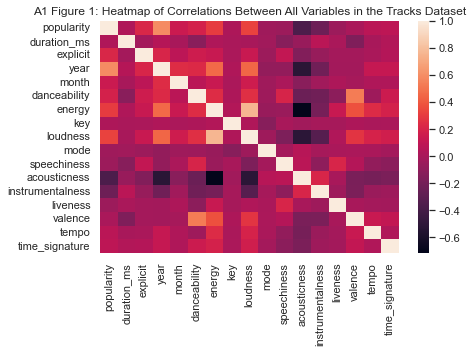

In [24]:
# Visualizing large-scale correlations in a heatmap

# First, importing seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Then, creating the heatmap figure
sns.set(rc={'figure.figsize':(6.7,4.27)})
d1_fig1 = sns.heatmap(tracks_df.corr())
plt.title('A1 Figure 1: Heatmap of Correlations Between All Variables in the Tracks Dataset')

#### A1 Figure 2: Scatterplot of Popularity and Explicit-ness

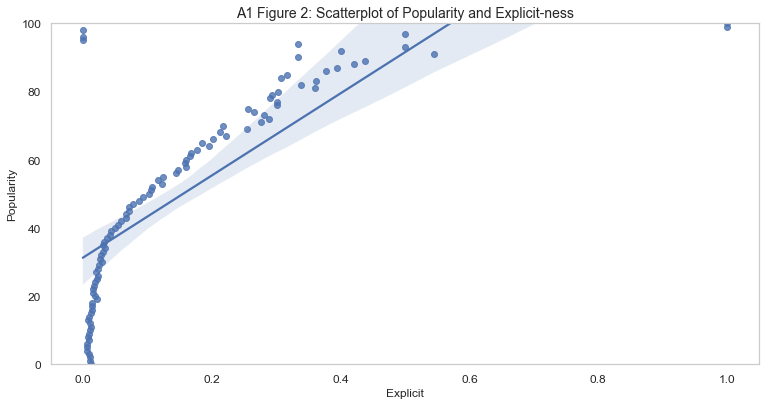

In [126]:
# creating a scatterplot to visualize the association between explicit and popularity
sns.set(rc={'figure.figsize':(12.7,6.27)})
sns.set_style('whitegrid')

fig2 = sns.regplot(x = 'explicit', y = 'popularity', data = explicit_df)
plt.ylim(0,100)
plt.xlabel('Explicit')
plt.ylabel('Popularity')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('A1 Figure 2: Scatterplot of Popularity and Explicit-ness', fontsize = 14)
# plt.xlim(.5,.75)
fig2.grid(False)

#### A1 Figure 3: Scatterplot of Popularity and Year of Release

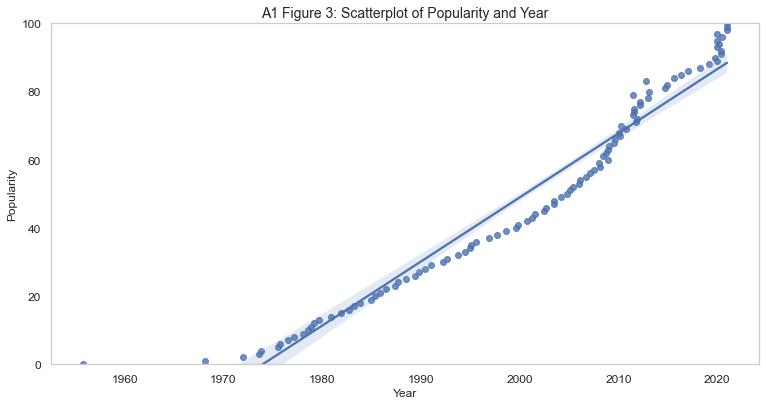

In [127]:
# creating a scatterplot to visualize the association between release yr and popularity
sns.set(rc={'figure.figsize':(12.7,6.27)})
sns.set_style('whitegrid')

fig3 = sns.regplot(x = 'year', y = 'popularity', data = year_df)
plt.ylim(0,100)
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('A1 Figure 3: Scatterplot of Popularity and Year', fontsize = 14)
# plt.xlim(.5,.75)
fig3.grid(False)

#### A1 Figure 4: Scatterplot of Danceability and Energy

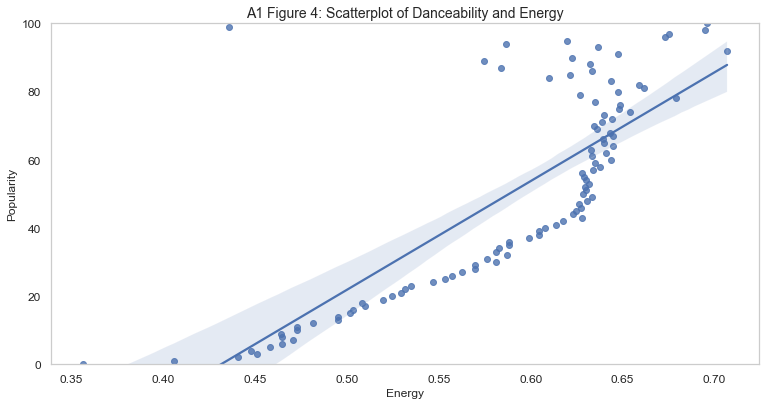

In [132]:
# Creating a scatterplot to visualize the relationship between energy and popularity
sns.set(rc={'figure.figsize':(12.7,6.27)})
sns.set_style('whitegrid')

fig6 = sns.regplot(x = 'energy', y = 'popularity', data = energy_df)
plt.ylim(0,100)
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('A1 Figure 4: Scatterplot of Danceability and Energy', fontsize = 14)
# plt.xlim(.5,.75)
fig6.grid(False)

#### A1 Figure 5: Scatterplot of Danceability and Loudness

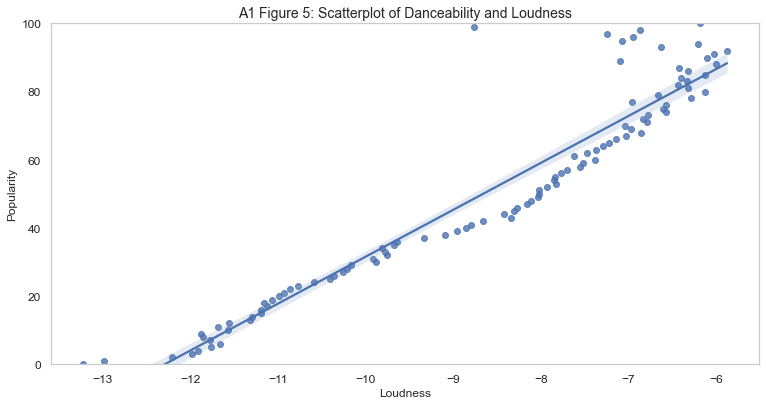

In [133]:
# Creating a scatterplot to visualize the relationship between energy and popularity
sns.set(rc={'figure.figsize':(12.7,6.27)})
sns.set_style('whitegrid')

fig7 = sns.regplot(x = 'loudness', y = 'popularity', data = loud_df)
plt.ylim(0,100)
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('A1 Figure 5: Scatterplot of Danceability and Loudness', fontsize = 14)
# plt.xlim(.5,.75)
fig7.grid(False)

#### A1 Figure 6: Scatterplot of Popularity and Acousticness

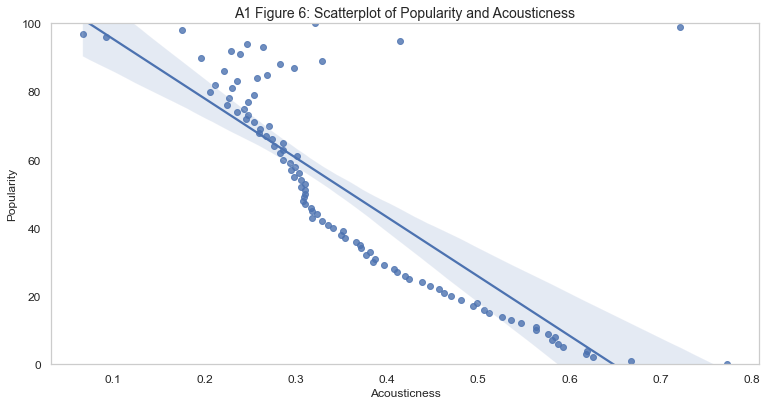

In [138]:
# Visualizing the relationship between acousticness and popularity

# creating a scatterplot to visualize the association between release yr and popularity
sns.set(rc={'figure.figsize':(12.7,6.27)})
sns.set_style('whitegrid')

fig6 = sns.regplot(x = 'acousticness', y = 'popularity', data = acoustic_df)
plt.ylim(0,100)
plt.xlabel('Acousticness')
plt.ylabel('Popularity')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('A1 Figure 6: Scatterplot of Popularity and Acousticness', fontsize = 14)
# plt.xlim(.5,.75)
fig6.grid(False)

#### A1 Figure 7: Scatterplot of Popularity and Instrumentalness

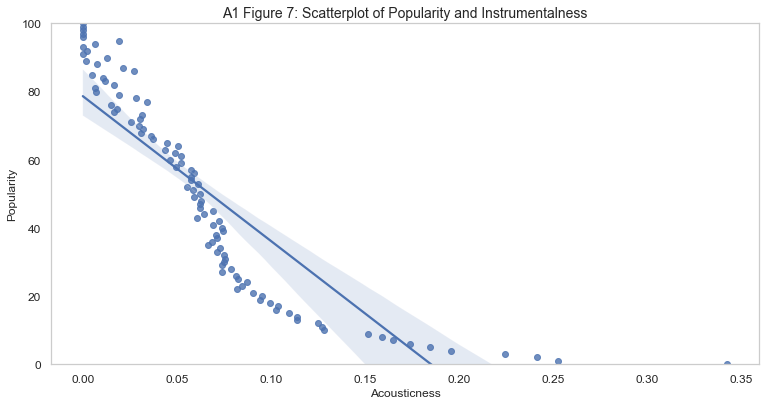

In [140]:
# Visualizing the relationship between acousticness and popularity

# creating a scatterplot to visualize the association between release yr and popularity
sns.set(rc={'figure.figsize':(12.7,6.27)})
sns.set_style('whitegrid')

fig6 = sns.regplot(x = 'instrumentalness', y = 'popularity', data = instrumental_df)
plt.ylim(0,100)
plt.xlabel('Acousticness')
plt.ylabel('Popularity')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('A1 Figure 7: Scatterplot of Popularity and Instrumentalness', fontsize = 14)
# plt.xlim(.5,.75)
fig6.grid(False)

### Analysis 2 Appendix

#### A2 Figure 1: Lineplot of Tempo over Time

<AxesSubplot:>

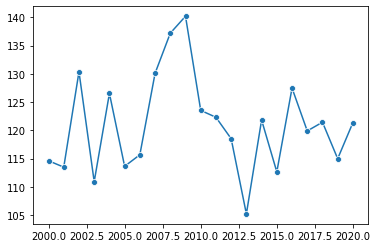

In [33]:
#Using a seaborn lineplot to visualize the trend of tempo for popular songs
sns.lineplot(x=year, y=tempo, marker='o')

#### A2 Figure 2: Lineplot of Valence over Time

<AxesSubplot:>

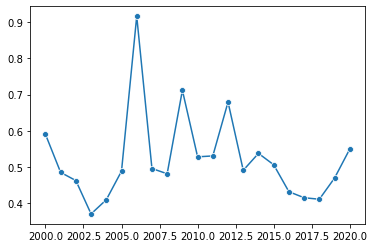

In [34]:
#Using a seaborn lineplot to visualize the trend of valence for popular songs
sns.lineplot(x=year, y=valence, marker='o')

#### A2 Figure 3: Pivot Table of Valence of popular songs through the years

In [35]:
spot_pop = spotify_copy.loc[(spotify_copy['popularity']>80)&(spotify_copy['year'].isin(range(2000,2021)))]
spot_pop_copy = spot_pop.copy()
spot_pop_copy['valence'] = spot_pop['valence'].apply(lambda x: 'High Valence' if x>0.7 else 'Low Valence' if x<0.3 else 'Medium Valence Valence')
pd.crosstab(spot_pop_copy.year,spot_pop_copy.valence)

valence,High Valence,Low Valence,Medium Valence Valence
year,,,
2000,2,1,2
2001,0,1,2
2002,1,2,1
2003,1,3,1
2004,0,1,1
2005,2,2,2
2006,2,0,0
2007,0,1,3
2008,2,1,5


#### A2 Figure 4: Lineplot of Speechiness over Time

<AxesSubplot:>

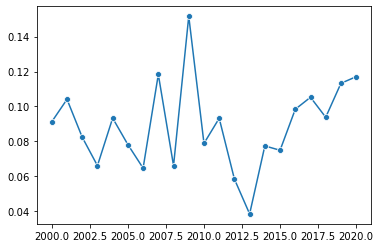

In [36]:
#Using a seaborn lineplot to visualize the trend of speechiness for popular songs
sns.lineplot(x=year, y=speechiness, marker='o')

#### A2 Figure 5: Lineplot of Instrumentalness over Time

<AxesSubplot:>

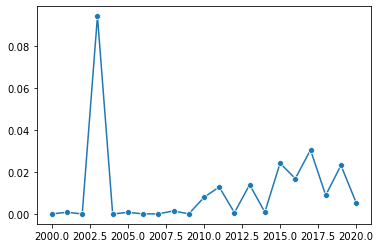

In [37]:
#Using a seaborn lineplot to visualize the trend of instrumentalness for popular songs 
sns.lineplot(x=year, y=instrumentalness, marker='o')

#### A2 Figure 6: Lineplot of Liveness over Time

<AxesSubplot:>

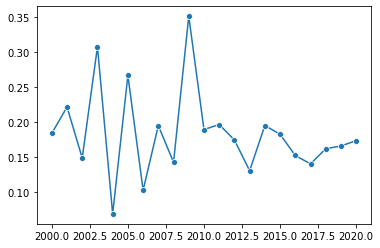

In [38]:
#Using a seaborn lineplot to visualize the trend of liveness for popular songs 
sns.lineplot(x=year, y=liveness, marker='o')

#### A2 Figure 7: Lineplot of Loudness over Time

<AxesSubplot:>

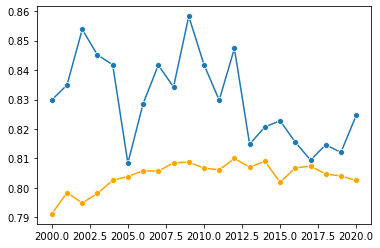

In [41]:
#Using a seaborn lineplot to visualize the trend of loudness
sns.lineplot(x=year, y=loudness, marker='o')
sns.lineplot(x=year, y=all_loudness, marker='o', color='orange')

#### A2 Figure 8: Lineplot of Danceability over Time

<AxesSubplot:>

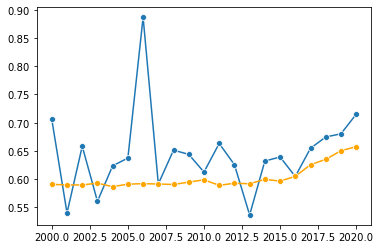

In [44]:
#Using a seaborn lineplot to visualize the trend of danceability
sns.lineplot(x=year, y=danceability, marker='o')
sns.lineplot(x=year, y=all_danceability, marker='o', color='orange')

#### A2 Figure 9: Lineplot of Acousticness over Time

<AxesSubplot:>

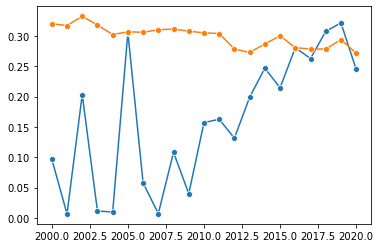

In [43]:
#Using a seaborn lineplot to visualize the trend of acousticness
sns.lineplot(x=year, y=acousticness, marker='o')
sns.lineplot(x=year, y=all_acousticness, marker='o')

#### A2 Figure 10: Lineplot of Energy over Time

<AxesSubplot:>

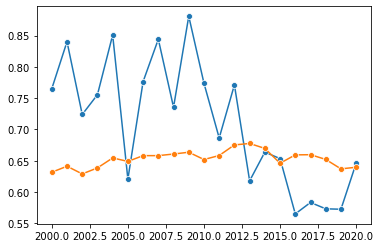

In [46]:
#Using a seaborn lineplot to visualize the trend of energy
sns.lineplot(x=year, y=energy, marker='o')
sns.lineplot(x=year, y=all_energy, marker='o')

#### A2 Figure 11: Pivot table of Acousticness, Loudness, Energy and Danceability of popular songs through the years

In [50]:
pd.crosstab(spot_pop_copy.year,[spot_pop_copy.danceability,spot_pop_copy.acousticness,spot_pop_copy.loudness,spot_pop_copy.energy])

danceability High Danceability                                         \
acousticness High acousticness            Low Acousticness              
loudness         High Loudness               High Loudness              
energy             High Energy Low Energy      High Energy Low Energy   
year                                                                    
2000                         0          0                4          0   
2001                         0          0                2          0   
2002                         0          1                3          0   
2003                         0          0                1          1   
2004                         0          0                1          0   
2005                         0          1                4          0   
2006                         0          0                2          0   
2007                         0          0                3          0   
2008                         0          1                6          0   
2009                         0          0                2          0   
2010                         1          0                5          0   
2011                         1          0                5          1   
2012                         0          1                9          0   
2013                         0          0                9          0   
2014                         2          2               14          1   
2015                         1          2               12          1   
2016                         0          0               13          4   
2017                         3          3               22          8   
2018                         6          8               36          7   
2019                         6         12               50         11   
2020                        14         12              164         19   

danceability  Low Danceability                                           \
acousticness High acousticness                         Low Acousticness   
loudness         High Loudness            Low Loudness    High Loudness   
energy             High Energy Low Energy   Low Energy      High Energy   
year                                                                      
2000                         0          0            0                1   
2001                         0          0            0                1   
2002                         0          0            0                0   
2003                         0          0            0                3   
2004                         0          0            0                1   
2005                         0          0            0                0   
2006                         0          0            0                0   
2007                         0          0            0                1   
2008                         0          0            0                1   
2009                         0          0            0                1   
2010                         0          0            0                0   
2011                         0          0            0                1   
2012                         0          0            0                3   
2013                         1          1            0                1   
2014                         0          1            0                2   
2015                         0          0            0                2   
2016                         2          4            0                2   
2017                         0          1            1                3   
2018                         0          3            0                2   
2019                         2          4            0                3   
2020                         2          6            0                8   

danceability             
acousticness             
loudness                 
energy       Low Energy  
year                     
2000                

### Analysis 3 Appendix

#### A3 Figure 1: Equal Sized Bins of Average Character Length

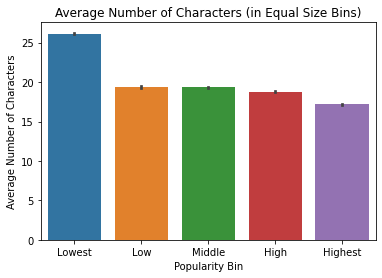

In [9]:
binned_plot = sns.barplot(x = 'bin_popularity', y = 'character_length', data = tracks_copy).set(xlabel ="Popularity Bin", ylabel = "Average Number of Characters", title='Average Number of Characters (in Equal Size Bins)')

#### A3 Figure 2: Equal Width Bins of Average Character Length

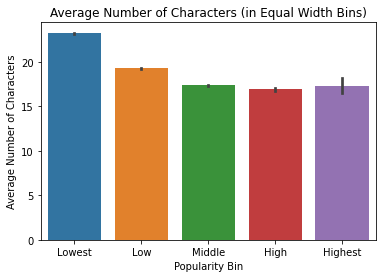

In [10]:
binned_plot_1 = sns.barplot(x = 'bin_popularity_1', y = 'character_length', data = tracks_copy).set(xlabel ="Popularity Bin", ylabel = "Average Number of Characters", title='Average Number of Characters (in Equal Width Bins)')

#### A3 Figure 3: Popular Words in 80 - 100 Popularity Segment

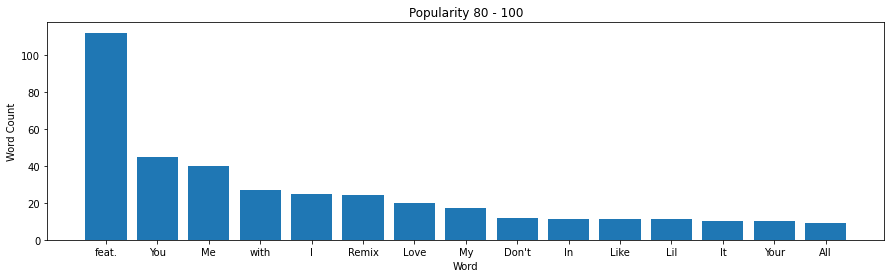

In [13]:
names = list(slice_sorted_80_100.keys())
values = list(slice_sorted_80_100.values())

f = plt.figure()
f.set_figwidth(15)

plt.xlabel("Word")
plt.ylabel("Word Count")
plt.title("Popularity 80 - 100")

word_occ = plt.bar(range(len(slice_sorted_80_100)), values, tick_label=names)
plt.show()

#### A3 Figure 4: Popular Words in 60 - 80 Popularity Segment

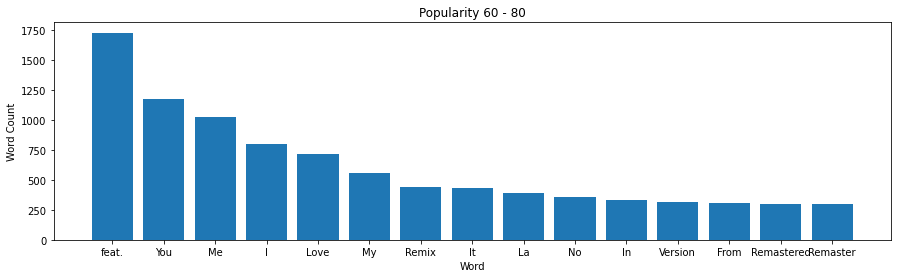

In [16]:
names_1 = list(slice_sorted_60_80.keys())
values_1 = list(slice_sorted_60_80.values())

f_1 = plt.figure()
f_1.set_figwidth(15)

plt.xlabel("Word")
plt.ylabel("Word Count")
plt.title("Popularity 60 - 80")

word_occ_1 = plt.bar(range(len(slice_sorted_60_80)), values_1, tick_label=names_1)
plt.show()

#### A3 Figure 5: Popular Words in 40 - 60 Popularity Segment

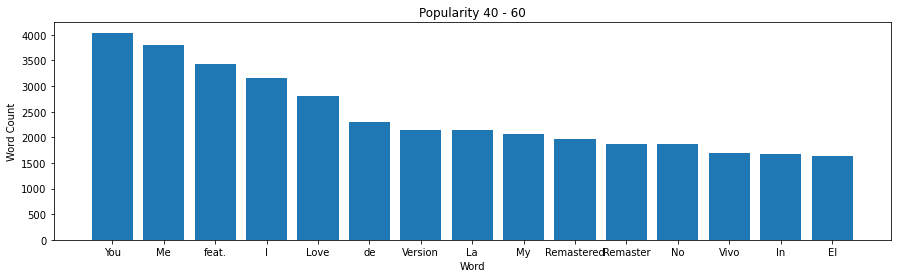

In [18]:
names_2 = list(slice_sorted_40_60.keys())
values_2 = list(slice_sorted_40_60.values())

f_2 = plt.figure()
f_2.set_figwidth(15)

plt.xlabel("Word")
plt.ylabel("Word Count")
plt.title("Popularity 40 - 60")

word_occ_2 = plt.bar(range(len(slice_sorted_40_60)), values_2, tick_label=names_2) 
plt.show()

#### A3 Figure 6: Popular Words in 20 - 40 Popularity Segment

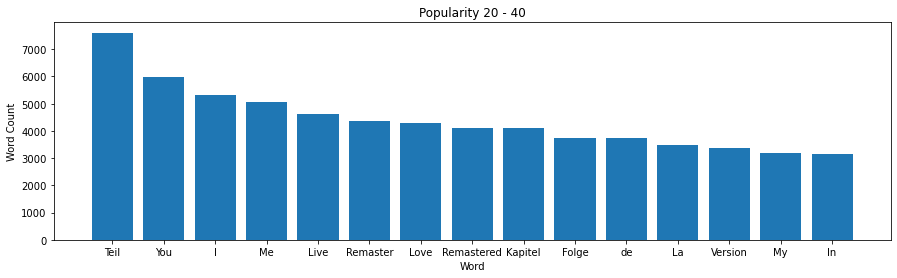

In [20]:
names_3 = list(slice_sorted_20_40.keys())
values_3 = list(slice_sorted_20_40.values())

f_3 = plt.figure()
f_3.set_figwidth(15)

plt.xlabel("Word")
plt.ylabel("Word Count")
plt.title("Popularity 20 - 40")

word_occ_3 = plt.bar(range(len(slice_sorted_20_40)), values_3, tick_label=names_3)
plt.show()

#### A3 Figure 7: Popular Words in Less than 20 Popularity Segment

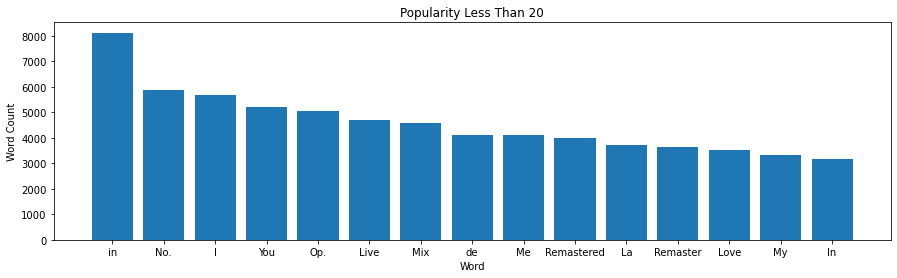

In [22]:
names_4 = list(slice_sorted_less_than_20.keys())
values_4 = list(slice_sorted_less_than_20.values())

f_4 = plt.figure()
f_4.set_figwidth(15)

plt.xlabel("Word")
plt.ylabel("Word Count")
plt.title("Popularity Less Than 20")

word_occ_4 = plt.bar(range(len(slice_sorted_less_than_20)), values_4, tick_label=names_4)
plt.show()

#### A3 Figure 8: Average Popularity of Songs with feat. and Songs Without

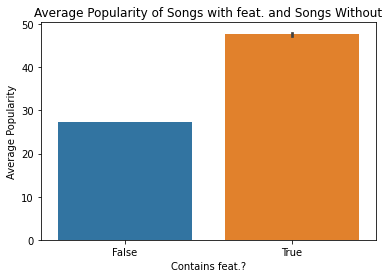

In [25]:
feat_pop_plot = sns.barplot(x = 'contains_feat', y = 'popularity', data = tracks_copy).set(xlabel ="Contains feat.?", ylabel = "Average Popularity", title='Average Popularity of Songs with feat. and Songs Without')

### Analysis 4 Appendix

__A4 Figure 1: Differences in US-only vs US & EU hit songs__

Text(0.5, 1.0, 'Differences in US-only vs US & EU hit songs')

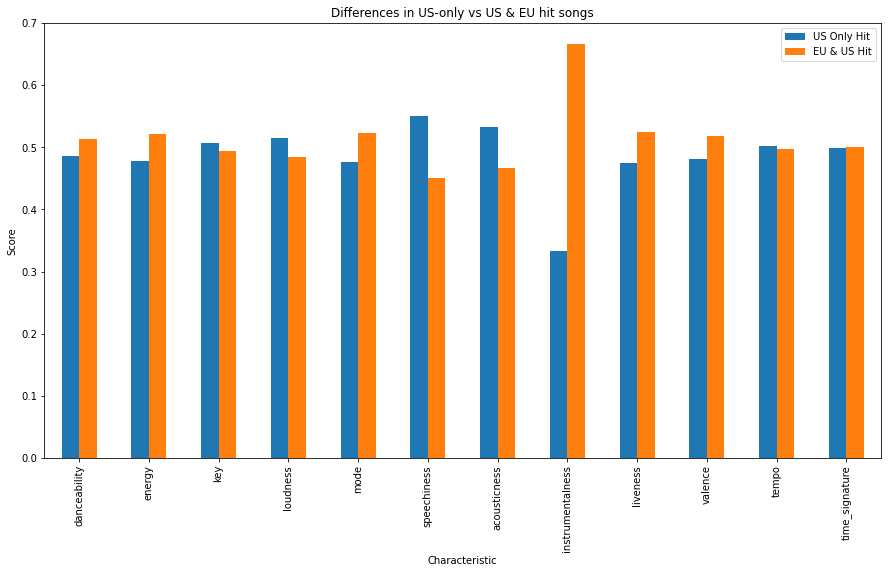

In [11]:
ax = df1.plot.bar(ylabel = 'Score',figsize=(15, 8), xlabel = 'Characteristic')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
ax.set_xticklabels(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'])
ax.legend(["US Only Hit", "EU & US Hit"])
ax.set_title('Differences in US-only vs US & EU hit songs')

__A4 Figure 2: Speechiness in US-only vs US & EU hits__

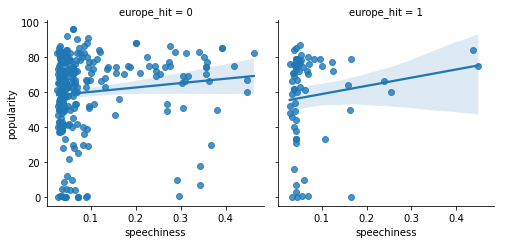

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
a = sns.FacetGrid(usa_chart_characteristics, col = 'europe_hit', height=3.5,aspect = 1)
a.map(sns.regplot, 'speechiness', 'popularity')
a.add_legend()

__A4 Figure 3: Platform-wide popularity of US-only and US & EU hits

[Text(0, 0, 'US only hit'), Text(1, 0, 'EU & US hit')]

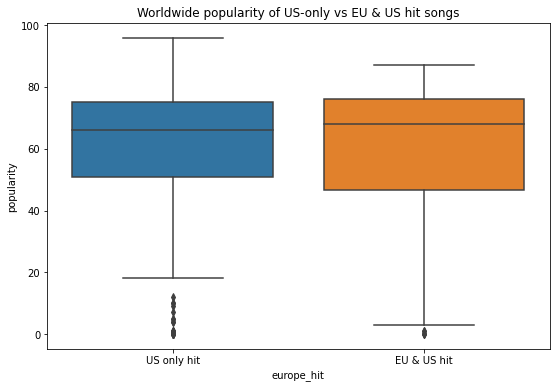

In [13]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6)
ax = sns.boxplot(x='europe_hit', y='popularity', data=usa_chart_characteristics)
ax.set_title('Worldwide popularity of US-only vs EU & US hit songs')
ax.set_xticklabels(['US only hit', 'EU & US hit'])